In [1]:
from google.colab import files
uploaded = files.upload()

Saving SQL - Retail Sales Analysis_utf .csv to SQL - Retail Sales Analysis_utf .csv


In [3]:
import pandas as pd

# Load the dataset

df = pd.read_csv("/content/SQL - Retail Sales Analysis_utf .csv")   # Use this line for .csv

# Display first few rows
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [4]:
# Convert 'sale_date' to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Extract month
df['Month'] = df['sale_date'].dt.to_period('M')

# Calculate Total Sales
df['Total Sales'] = df['quantiy'] * df['price_per_unit']

df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale,Month,Total Sales
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-11,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,2022-07,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,2022-12,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-01,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,2022-11,1500.0


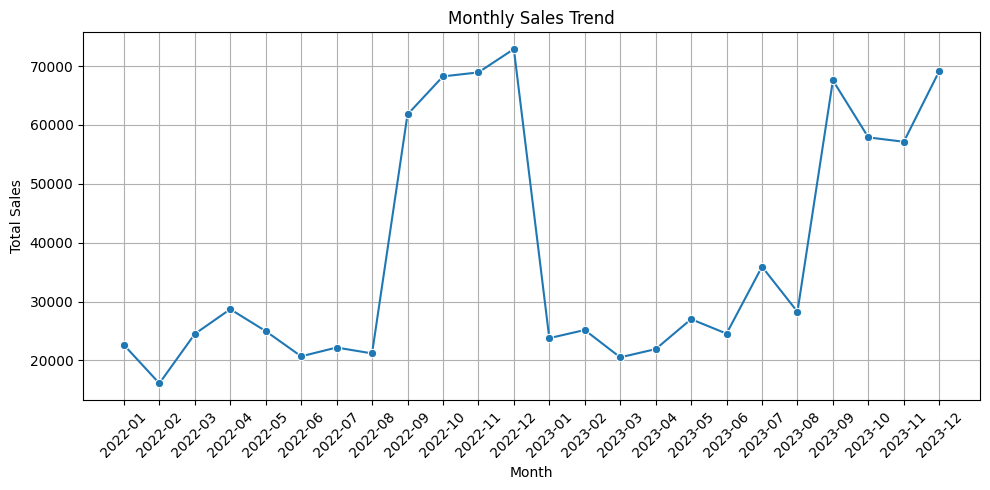

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-372041453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='category', x='Total Sales', palette='viridis')


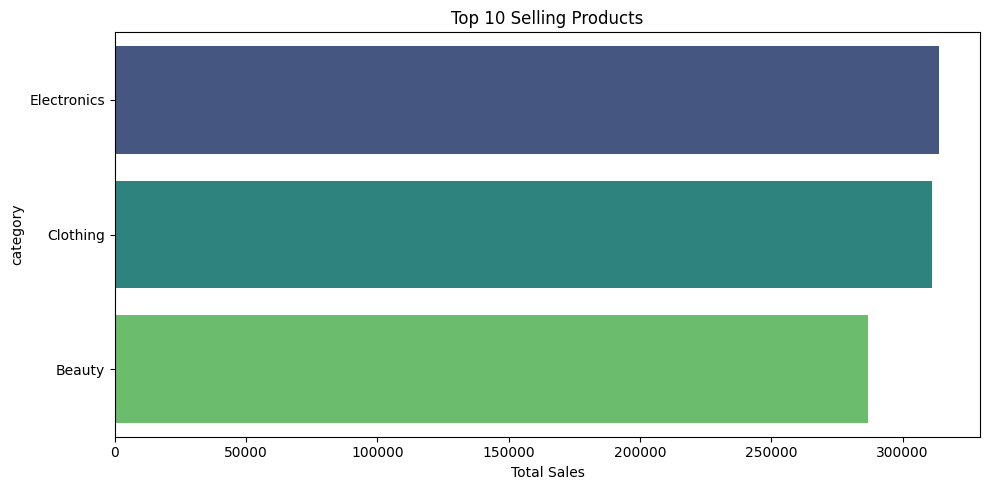

In [6]:
top_products = df.groupby('category')['Total Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_products, y='category', x='Total Sales', palette='viridis')
plt.title("Top 10 Selling Products")
plt.tight_layout()
plt.show()

In [7]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mean())

###Key Insights:
- Sales peaked in December and were lowest in February.
- The most sold category was "Clothing".
- There’s an opportunity to improve sales in underperforming months.
